# Week 4 (Parametric Method)

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
annual_gold_price = pd.read_csv('annual_gold_price.csv')
print(annual_gold_price)
# annual_gold_price = annual_gold_price.to_numpy()
# annual_gold_price

    Year  Price
0   2022  52950
1   2021  50045
2   2020  48651
3   2019  35220
4   2018  31438
5   2017  29667
6   2016  28623
7   2015  26343
8   2014  28006
9   2013  29600
10  2012  31050
11  2011  26400
12  2010  18500
13  2009  14500
14  2008  12500
15  2007  10800
16  2006   8400
17  2005   7000
18  2004   5850
19  2003   5600
20  2002   4990
21  2001   4300
22  2000   4400
23  1999   4232
24  1998   4045
25  1997   4725
26  1996   5160
27  1995   4680
28  1994   4598
29  1993   4140
30  1992   4334
31  1991   3466
32  1990   3200
33  1989   3140
34  1988   3130
35  1987   2570
36  1986   2140
37  1985   2130
38  1984   1970
39  1983   1800
40  1982   1645
41  1981   1800
42  1980   1330
43  1979    937
44  1978    685
45  1977    486
46  1976    432
47  1975    540
48  1974    506
49  1973    279
50  1972    202
51  1971    193
52  1970    184
53  1969    176
54  1968    162
55  1967    103
56  1966     84
57  1965     72


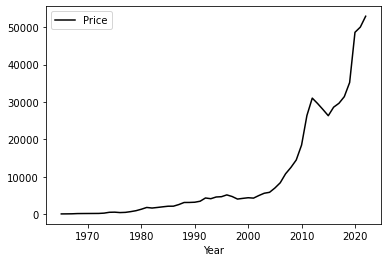

In [3]:
axis1 = annual_gold_price.plot(x='Year',y='Price',c='Black')

In [4]:
Y = annual_gold_price['Price'] # dependent
X = annual_gold_price['Year'] # independent

In [5]:
Xi_sum = X.sum()
print('Xi sum: ',Xi_sum,'\n')

Yi_sum = Y.sum()
print('Yi sum: ',Yi_sum,'\n')

XiYi = annual_gold_price.product()
XiYi_sum = XiYi.sum()
print('XiYi sum: ',XiYi_sum,'\n')

Xi_sq = X**2
Xi_sq_sum = Xi_sq.sum()
print('Xi sq. sum: ',Xi_sq_sum,'\n')

Xi sum:  115623 

Yi sum:  584109 

XiYi sum:  1297036692682702848 

Xi sq. sum:  230510705 



In [6]:
n = annual_gold_price.shape[0]
b = ((n * XiYi_sum) - (Xi_sum * Yi_sum)) / ((n * Xi_sq_sum) - (Xi_sum) ** 2)
a = (Yi_sum - (b*Xi_sum))/n

/tmp/ipykernel_7016/461947426.py:2: RuntimeWarning: overflow encountered in long_scalars
  b = ((n * XiYi_sum) - (Xi_sum * Yi_sum)) / ((n * Xi_sq_sum) - (Xi_sum) ** 2)


In [7]:
x=2025

In [8]:
predicted = a + b*x
print('predicted gold price in the year',x,' is: ', predicted,'\n')

predicted gold price in the year 2025  is:  48152482045811.0 



In [9]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# Load the gold price data
gold_price_data = pd.read_csv("annual_gold_price.csv")

# Load the silver price data
silver_price_data = pd.read_csv("silver_rates.csv")

# Combine the two data sets
data = pd.merge(gold_price_data, silver_price_data, on="Year")

# Separate the independent and dependent variables
x = data[["Year", "Silver Rates in Rs./Kg"]]
y = data["Price"]

# Fit the linear regression model
model = LinearRegression()
model.fit(x, y)

# coefficients
b0 = model.intercept_
b1 = model.coef_[0]
b2 = model.coef_[1]

# Print the fitted regression equation
print("The fitted regression equation is:")
print("gold_price = " + str(b0) + " + " + str(b1) + " year + " + str(b2) + " silver_price")

# Compute the error, MSE, and RMSE
error = y - model.predict(x)
mse = np.mean(error**2)
rmse = np.sqrt(mse)

# Print the error, MSE, and RMSE
#print("The error is: " + str(error))
print("The MSE is: " + str(mse))
print("The RMSE is: " + str(rmse))

# Predict the gold price for the year 2024
year_2024 = 2024
silver_price_2024 = 50
predicted_gold_price_2024 = b0 + b1 * year_2024 + b2 * silver_price_2024

print("The predicted gold price for the year 2024 is: " + str(predicted_gold_price_2024))

# Compare the coefficients obtained from the sklearn model with the program
from sklearn.metrics import mean_squared_error

# Fit the sklearn linear regression model
sklearn_model = LinearRegression()
sklearn_model.fit(x, y)

# Get the coefficients of the sklearn model
sklearn_b0 = sklearn_model.intercept_
sklearn_b1 = sklearn_model.coef_[0]
sklearn_b2 = sklearn_model.coef_[1]

# Compare the coefficients
print("The coefficients of the sklearn model are:")
print("b0 = " + str(sklearn_b0))
print("b1 = " + str(sklearn_b1))
print("b2 = " + str(sklearn_b2))


The fitted regression equation is:
gold_price = -798873.3795492619 + 401.3149467913555 year + 0.4127043687297056 silver_price
The MSE is: 34910295.649327025
The RMSE is: 5908.493517752814
The predicted gold price for the year 2024 is: 13408.707974878145
The coefficients of the sklearn model are:
b0 = -798873.3795492619
b1 = 401.3149467913555
b2 = 0.4127043687297056


Fitted equation: y = 675.3429819434613x + -1336225.389676704


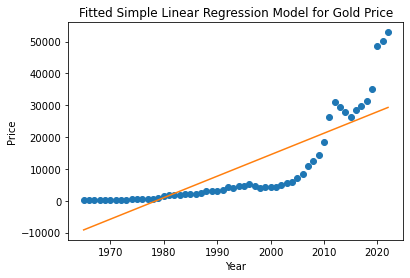

MSE:  62645019.49963982
RMSE:  7914.860674682772
Predicted price for year 2025 (24 carat per 10gms):  31344.14875880489
Predicted price for year 2025 (1gm):  3134.414875880489


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the gold price data
data = pd.read_csv('annual_gold_price.csv')

# Extract the year and price columns
year = data['Year']
price = data['Price']

# Fit a linear regression model
model = np.polyfit(year, price, 1)

# Get the slope and intercept of the line
slope = model[0]
intercept = model[1]

# Print the fitted equation
print('Fitted equation: y = ' + str(slope) + 'x + ' + str(intercept))

# Plot the data and the fitted line
plt.plot(year, price, 'o')
plt.plot(year, slope * year + intercept)
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Fitted Simple Linear Regression Model for Gold Price')
plt.show()

# Compute the error, MSE, and RMSE
error = price - (slope * year + intercept)
MSE = np.mean(error**2)
RMSE = np.sqrt(MSE)

#print('Error: ', error)
print('MSE: ', MSE)
print('RMSE: ', RMSE)

# Predict the gold price with the year 2025
year_p = 2025
predicted_price = slope * year_p + intercept

print('Predicted price for year',year_p, '(24 carat per 10gms): ', predicted_price)
print('Predicted price for year',year_p,'(1gm): ', predicted_price/10)

In [12]:

# Predict the gold price with the year 2025
year = 2024
predicted_price = slope * year + intercept

print('Predicted price for year (24 carat per 10gms) ', year , ': ', predicted_price)
print('Predicted price for year (1gm) ',year, ': ', predicted_price/10)


Predicted price for year (24 carat per 10gms)  2024 :  30668.805776861496
Predicted price for year (1gm)  2024 :  3066.8805776861495


In [13]:
data2= pd.read_csv('silver_rates.csv')
Y = data2['Silver Rates in Rs./Kg'] # dependent
X = data2['Year'] # independent

Fitted equation: y = 675.342981943462x + -1336225.389676705


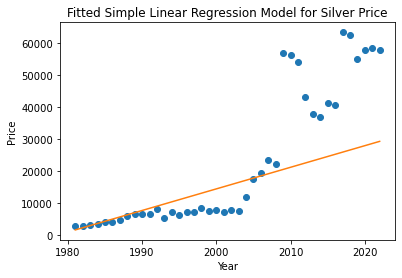

Predicted Silver price for  2024 :  58031.61750803562
Predicted Silver price for  2024 (1gm):  5803.1617508035615


In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Fit a linear regression model
def fit_linear_regression(x, y):
    # Calculate the mean of x and y
    x_mean = np.mean(x)
    y_mean = np.mean(y)

    # Calculate the slope and intercept
    slope1 = np.sum((x - x_mean)*(y - y_mean)) / np.sum((x - x_mean)**2)
    intercept1 = y_mean - slope1 * x_mean

    return slope1, intercept1

slope1, intercept1 = fit_linear_regression(data2['Year'], data2['Silver Rates in Rs./Kg'])

# Print the fitted equation
print('Fitted equation: y = ' + str(slope) + 'x + ' + str(intercept))

# Plot the data and the fitted line
plt.plot(data2['Year'], data2['Silver Rates in Rs./Kg'], 'o')
plt.plot(data2['Year'], slope * data2['Year'] + intercept)
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Fitted Simple Linear Regression Model for Silver Price')
plt.show()

# Predict the Silver price with the year 2025
year = 2024
predicted_price = slope1 * year + intercept1

print('Predicted Silver price for ',year,': ', predicted_price)
print('Predicted Silver price for ',year,'(1gm): ', predicted_price/10)
